In [2]:
import pandas as pd

# Loading the CSV file into a DataFrame
df = pd.read_csv('DCT_withoutduplicate 1.csv')  


# Assuming the labels are in the last column and the features are in the rest
X = df.iloc[:, :-1].values  # All columns except the last one as features
y = df.iloc[:, -1].values   # The last column as the target/labels


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Confusion matrix and metrics for training data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='macro')
recall_train = recall_score(y_train, y_train_pred, average='macro')
f1_train = f1_score(y_train, y_train_pred, average='macro')

# Confusion matrix and metrics for test data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='macro')
recall_test = recall_score(y_test, y_test_pred, average='macro')
f1_test = f1_score(y_test, y_test_pred, average='macro')

print("Training Data: Precision: {}, Recall: {}, F1-Score: {}".format(precision_train, recall_train, f1_train))
print("Test Data: Precision: {}, Recall: {}, F1-Score: {}".format(precision_test, recall_test, f1_test))


Training Data: Precision: 0.9223044491858059, Recall: 0.9268716705731361, F1-Score: 0.9239783593514151
Test Data: Precision: 0.7789941389440762, Recall: 0.7897228951569973, F1-Score: 0.7733281126095158


/Users/shreyamittal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shreyamittal/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
#A2:

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# knn_regressor is trained and X_test contains test features
y_pred = knn.predict(X_test)  # Predictions

# Calculate MSE, RMSE, MAPE, and R2 scores
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: {}, RMSE: {}, MAPE: {}, R2: {}".format(mse, rmse, mape, r2))


MSE: 88.01555555555555, RMSE: 9.381660596906901, MAPE: 0.0006768006084831818, R2: 0.8952105553402258


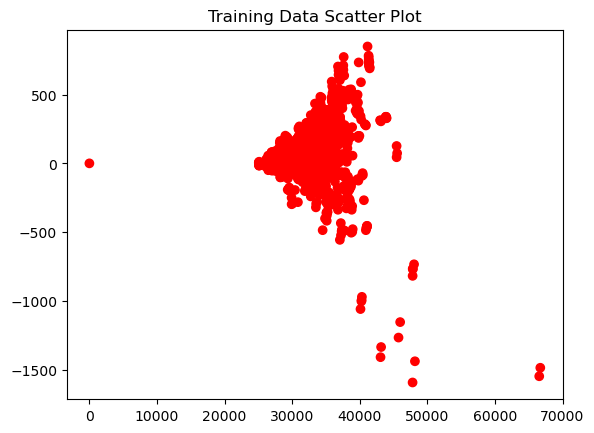

In [7]:
import matplotlib.pyplot as plt

# two features from The dataset for the scatter plot 
X_train = X_train[:, :2]  # using the first two columns of X_train 
y_train = y_train  # Labels from the CSV file

# Scatter plot of training data
colors = ['blue' if label == 0 else 'red' for label in y_train]
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors)
plt.title('Training Data Scatter Plot')
plt.show()


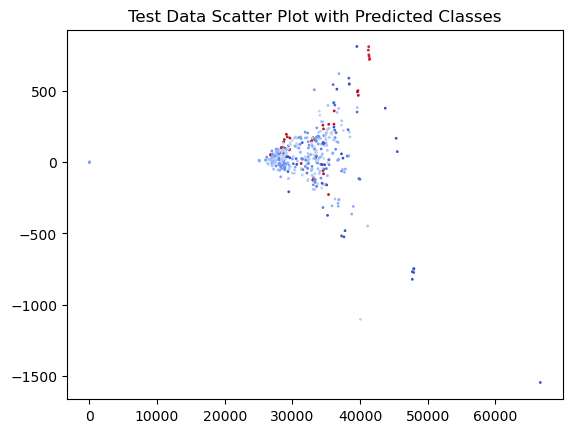

In [10]:
# Predict on X_test using the same number of features as training
y_test_pred = knn.predict(X_test)  # Use all features (196 in this case)

# Scatter plot (optional)
# Since we're plotting, we can extract the first two features for visualization
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, s=1, cmap='coolwarm')
plt.title('Test Data Scatter Plot with Predicted Classes')
plt.show()


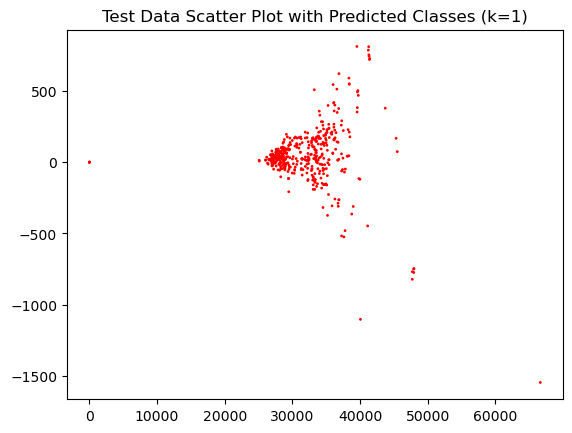

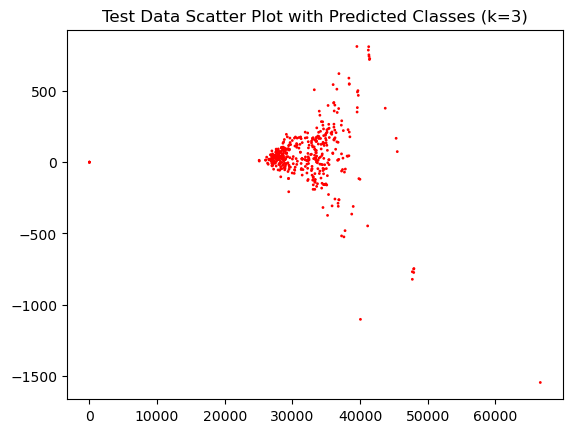

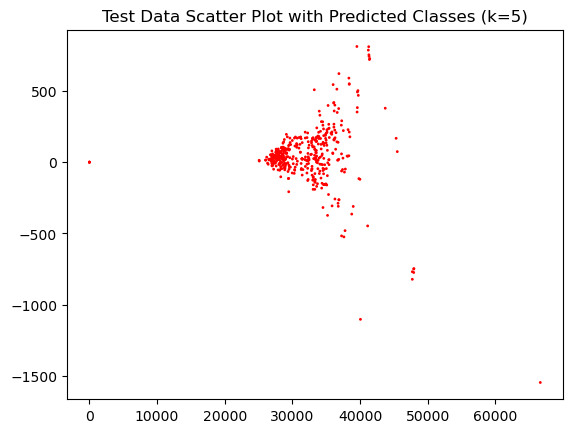

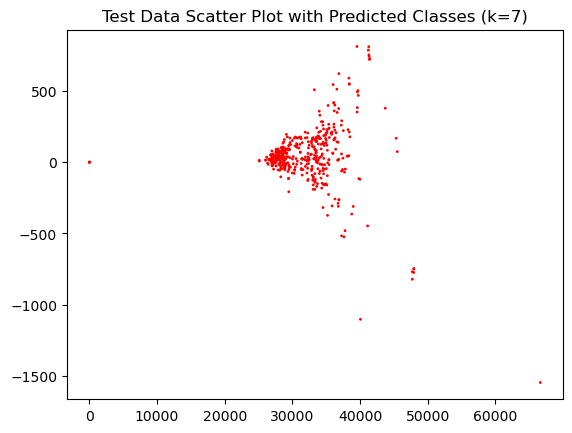

In [11]:
for k in [1, 3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test[:, :2])

    colors_test = ['blue' if label == 0 else 'red' for label in y_test_pred]
    plt.scatter(X_test[:, 0], X_test[:, 1], c=colors_test, s=1)
    plt.title(f'Test Data Scatter Plot with Predicted Classes (k={k})')
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_classification
import pandas as pd

# Loading the CSV file into a DataFrame
df = pd.read_csv('DCT_withoutduplicate 1.csv')  


# Assuming the labels are in the last column and the features are in the rest
X = df.iloc[:, :-1].values  # All columns except the last one as features
y = df.iloc[:, -1].values   # The last column as the target/labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid for GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 30)}

# Use GridSearchCV for kNN
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

# Get the best k value from GridSearchCV
best_k = grid.best_params_['n_neighbors']
print("Best k value found: ", best_k)

# Train kNN with the best k value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Create a mesh grid for visualization (for plotting points)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict class labels for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the mesh grid with decision boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Scatter plot for the training data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', cmap=plt.cm.coolwarm)
plt.title(f'kNN Classification with k={best_k}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


/Users/shreyamittal/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best k value found:  1
